<a href="https://colab.research.google.com/github/yuvraj1841/COllab_noteBook/blob/main/Perceptron_lab1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
sonar = load_breast_cancer()

In [2]:
X = sonar.data
y = sonar.target
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


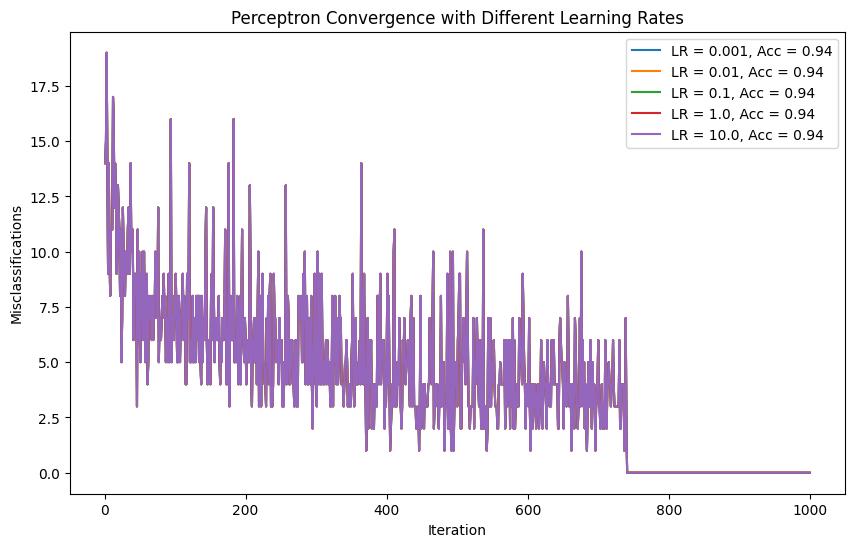

In [3]:
def train_perceptron(learning_rate):
    perceptron = Perceptron(max_iter=1000, eta0=learning_rate, random_state=42)

    errors = []  # To track misclassifications during training

    for _ in range(perceptron.max_iter):
        perceptron.partial_fit(X_train, y_train, classes=np.unique(y))
        y_pred = perceptron.predict(X_train)
        errors.append(np.sum(y_pred != y_train))

    y_pred_test = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)

    return perceptron, accuracy, errors
learning_rates = [0.001, 0.01, 0.1, 1.0, 10.0]
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    perceptron, accuracy, errors = train_perceptron(lr)
    plt.plot(range(1, len(errors) + 1), errors, label=f'LR = {lr}, Acc = {accuracy:.2f}')

plt.xlabel('Iteration')
plt.ylabel('Misclassifications')
plt.title('Perceptron Convergence with Different Learning Rates')
plt.legend()
plt.show()


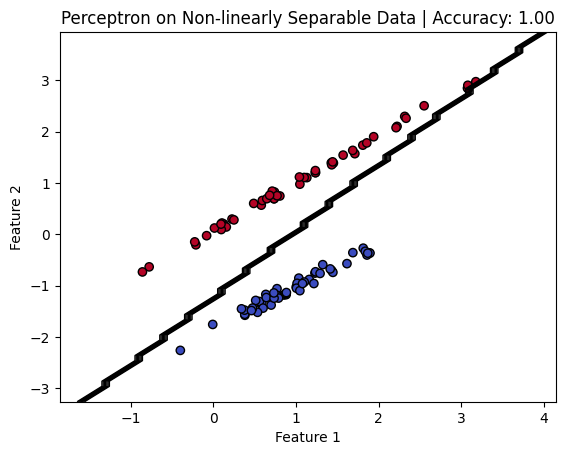

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def train_perceptron():
    perceptron = Perceptron(max_iter=1000, random_state=42)
    perceptron.fit(X_train, y_train)
    y_pred = perceptron.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return perceptron, accuracy
perceptron, accuracy = train_perceptron()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o', edgecolors='k')
plt.title(f'Perceptron on Non-linearly Separable Data | Accuracy: {accuracy:.2f}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', linewidths=1)
plt.show()
